<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


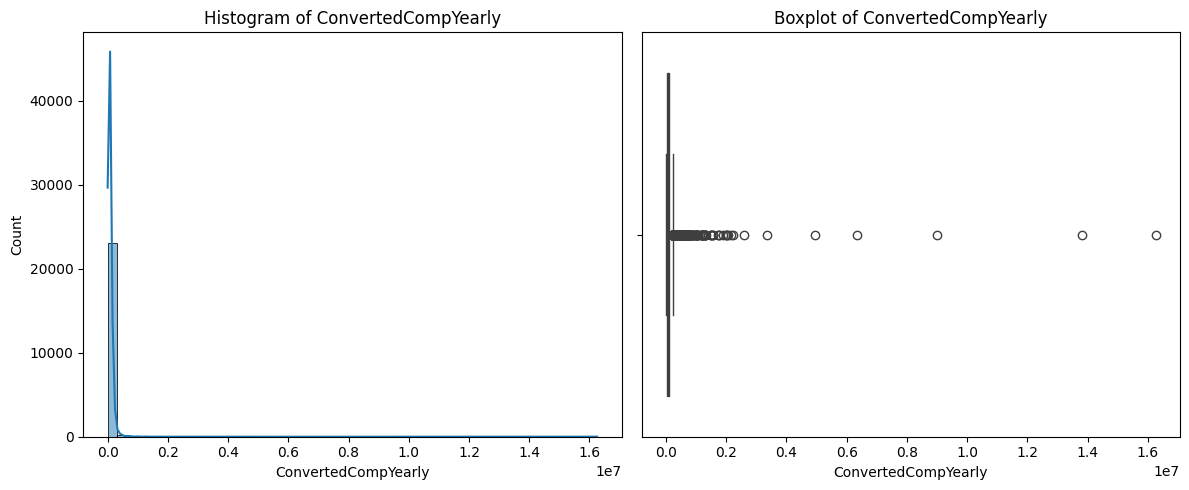

In [4]:
comp = pd.to_numeric(df['ConvertedCompYearly'], errors = 'coerce')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(comp.dropna(), kde=True, bins=50)
plt.title('Histogram of ConvertedCompYearly')

plt.subplot(1,2,2)
sns.boxplot(x=comp)
plt.title('Boxplot of ConvertedCompYearly')

plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

FT_Employees = df[df['Employment'] == 'Employed, full-time']

median_compensation_FT = FT_Employees['ConvertedCompYearly'].median()

print(F"Median Compensation for Full-Time Employees (USD): {median_compensation_FT}")

Median Compensation for Full-Time Employees (USD): 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_3896/3805291440.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


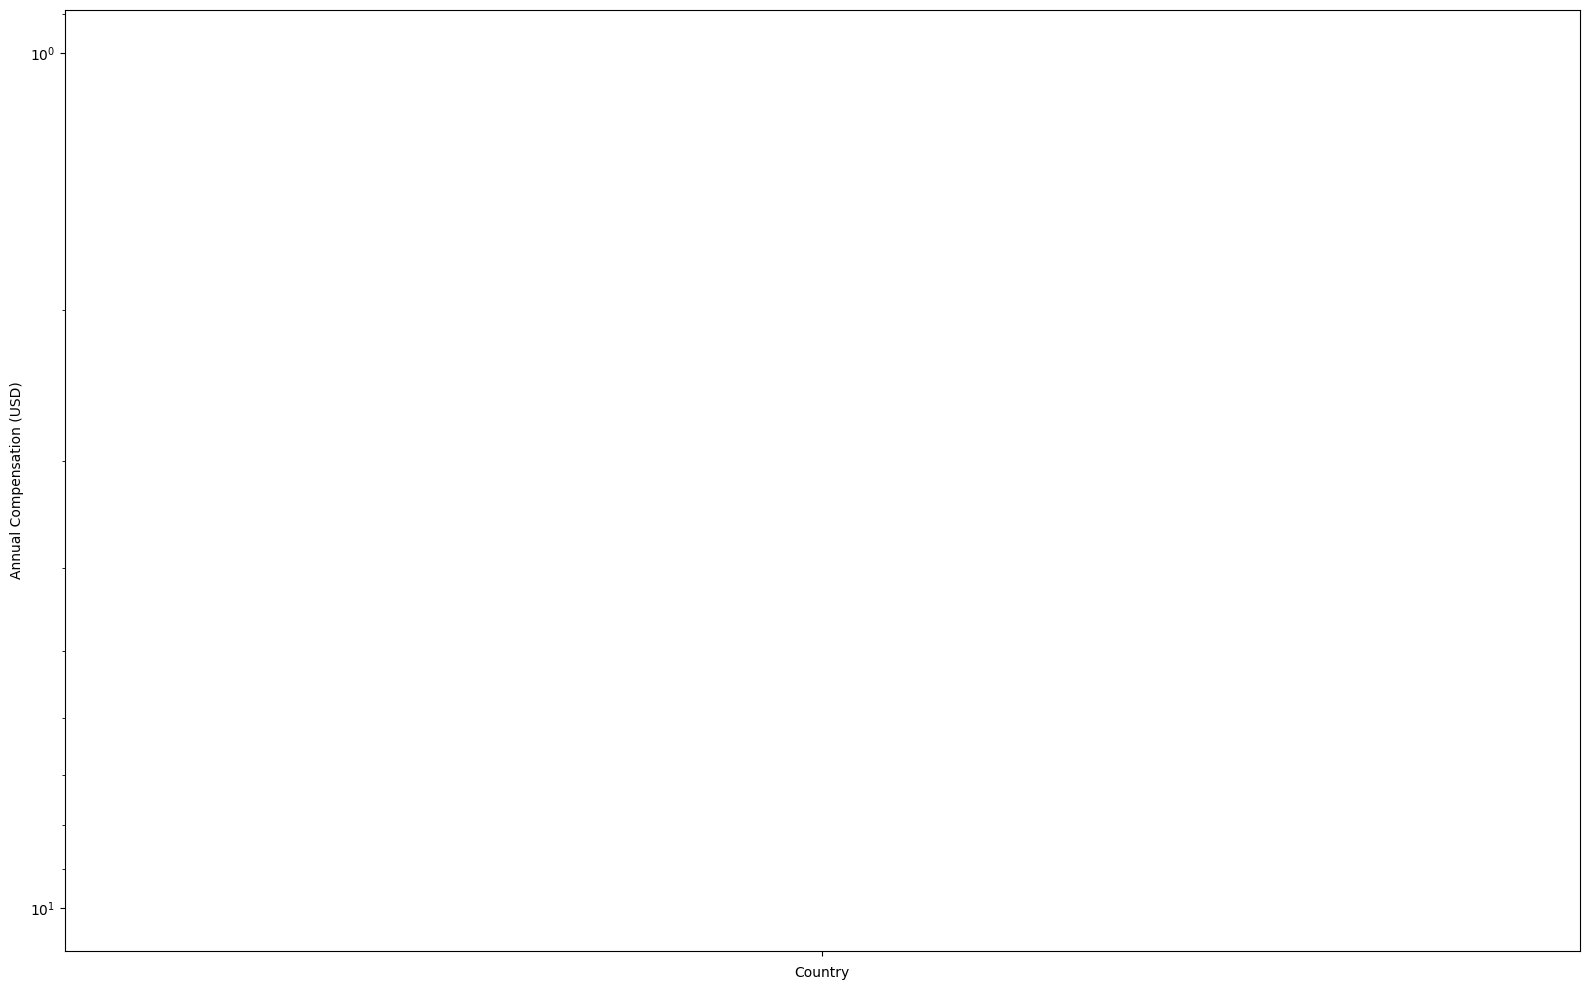


Compensation Statistics By Country (for countries with >= 500 respondents):
                                                      min        max  \
Country                                                                
United States of America                              1.0  1900000.0   
Australia                                            96.0  2048046.0   
Canada                                               58.0  1562898.0   
United Kingdom of Great Britain and Northern Ir...   38.0  1273879.0   
Germany                                               1.0  1288874.0   
Netherlands                                         322.0   537031.0   
Poland                                               24.0  1000000.0   
France                                                1.0   644437.0   
Spain                                                39.0   429625.0   
Italy                                                16.0   644437.0   
Ukraine                                               1.0  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

df1_comp = df.dropna(subset = ['ConvertedCompYearly', 'Country'])

country_counts = df1_comp['Country'].value_counts()
top_countries = country_counts[country_counts >=500].index.tolist()
df_top_countries = df1_comp[df1_comp['Country'].isin(top_countries)]

plt.figure(figsize = (16,10))
sns.boxplot('Compensation Distribution Across Top Countries')
plt.xlabel('Country')
plt.ylabel('Annual Compensation (USD)')
plt.xticks(rotation=45, ha = 'right')
plt.yscale('log')
plt.tight_layout()
plt.show()

comp_stats = df1_comp.groupby('Country')['ConvertedCompYearly'].agg(['min', 'max', 'median', 'mean', 'std', 'count'])
print("\nCompensation Statistics By Country (for countries with >= 500 respondents):")
print(comp_stats.loc[top_countries].sort_values(by = 'median', ascending = False))

def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

print("\nExamples of Potential High Compensation Anomalies (Outliers) By Country:")
for country in top_countries:
    outliers = identify_outliers(df_top_countries[df_top_countries['Country'] == country]['ConvertedCompYearly'])
    if not outliers.empty:
        print(f"\n{country}:")
        print(outliers.head())

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [13]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

df1_comp = df.dropna(subset=['ConvertedCompYearly'])

Q1 = df1_comp['ConvertedCompYearly'].quantile(0.25)
Q3 = df1_comp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1_comp_no_outliers = df1_comp[
                                (df1_comp['ConvertedCompYearly'] >= lower_bound) & (df1_comp['ConvertedCompYearly'] <= upper_bound)]

print(f"Shape of DF after handling missing 'ConvertedCompYearly': {df1_comp.shape}")
print(f"Shape of Df after removing 'ConvertedCompYearly' outliers: {df1_comp_no_outliers.shape}")

print("\nDescriptive Statistics of 'ConvertedCompYearly' Before Outlier Remove:")
print(df1_comp['ConvertedCompYearly'].describe())

print("\nDescriptive Statistics of 'ConvertedCompYearly' After Outlier Remove:")
print(df1_comp_no_outliers['ConvertedCompYearly'].describe())

Shape of DF after handling missing 'ConvertedCompYearly': (23435, 114)
Shape of Df after removing 'ConvertedCompYearly' outliers: (22457, 114)

Descriptive Statistics of 'ConvertedCompYearly' Before Outlier Remove:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Descriptive Statistics of 'ConvertedCompYearly' After Outlier Remove:
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


/tmp/ipykernel_3896/1864111871.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['JobSatPoints_1'] = df1['JobSat'].map(job_sat_map)


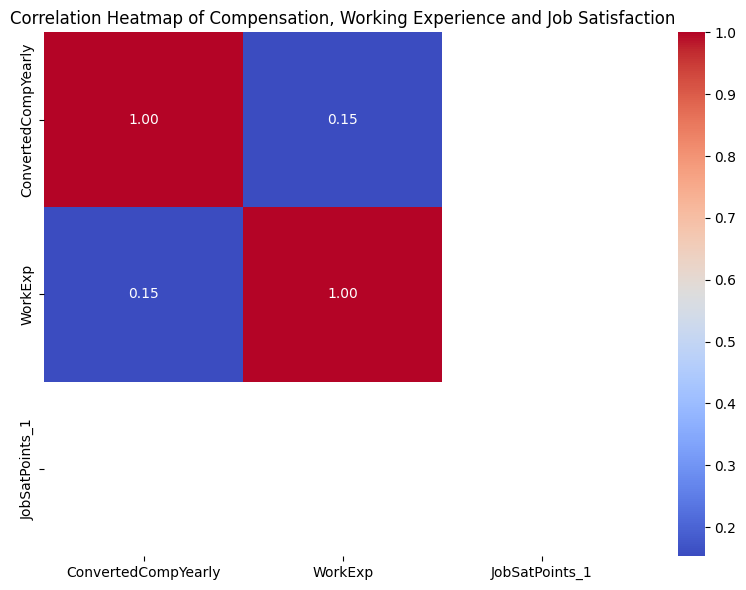


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153135             NaN
WorkExp                         0.153135  1.000000             NaN
JobSatPoints_1                       NaN       NaN             NaN


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

df1 = df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSat'])

job_sat_map = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}
df1['JobSatPoints_1'] = df1['JobSat'].map(job_sat_map)

df_corr = df1[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Compensation, Working Experience and Job Satisfaction')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

df1 = df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSat'])

job_sat_map = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}
df1['JobSatPoints_1'] = df1['JobSat'].map(job_sat_map)

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'WorkExp', y = 'ConvertedCompYearly', data = df1)
plt.xlabel('Working Experience (Years)')
plt.ylabel('Annual Compensation (USD)')
plt.yscale('log')
plt.grid(True)
plt.title('Scatter Plot: Annual Compensation VS Working Experience')
plt.tight_layout()
plt.show()

plt.figure(figsize(10,6))
sns.scatterplot(x = 'JobSatPoints_1', y = 'ConvertedCompYearly', data = df1)
plt.xlabel('Job Satisfaction (1: Very Dissatisfied to 5: Very Satisfied)')
plt.ylabel('Annual Compensation (USD)')
plt.title('Scatter Plot: Annual Compensat

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
